# Support Vector Machine (Regression) - Concrete Slump

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.preprocessing import StandardScaler

In [4]:
from sklearn.svm import SVR

In [5]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [6]:
from sklearn.model_selection import GridSearchCV

In [7]:
from sklearn.pipeline import Pipeline

## Import Dataset

In [8]:
df = pd.read_csv('cement_slump.csv')

In [9]:
df.head()

Cement   Slag  Fly ash  Water    SP  Coarse Aggr.  Fine Aggr.  SLUMP(cm)   
0   273.0   82.0    105.0  210.0   9.0         904.0       680.0       23.0  \
1   163.0  149.0    191.0  180.0  12.0         843.0       746.0        0.0   
2   162.0  148.0    191.0  179.0  16.0         840.0       743.0        1.0   
3   162.0  148.0    190.0  179.0  19.0         838.0       741.0        3.0   
4   154.0  112.0    144.0  220.0  10.0         923.0       658.0       20.0   

   FLOW(cm)  Compressive Strength (28-day)(Mpa)  
0      62.0                               34.99  
1      20.0                               41.14  
2      20.0                               41.81  
3      21.5                               42.08  
4      64.0                               26.82

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Cement                              103 non-null    float64
 1   Slag                                103 non-null    float64
 2   Fly ash                             103 non-null    float64
 3   Water                               103 non-null    float64
 4   SP                                  103 non-null    float64
 5   Coarse Aggr.                        103 non-null    float64
 6   Fine Aggr.                          103 non-null    float64
 7   SLUMP(cm)                           103 non-null    float64
 8   FLOW(cm)                            103 non-null    float64
 9   Compressive Strength (28-day)(Mpa)  103 non-null    float64
dtypes: float64(10)
memory usage: 8.2 KB


In [11]:
df.isnull().sum()

Cement                                0
Slag                                  0
Fly ash                               0
Water                                 0
SP                                    0
Coarse Aggr.                          0
Fine Aggr.                            0
SLUMP(cm)                             0
FLOW(cm)                              0
Compressive Strength (28-day)(Mpa)    0
dtype: int64

In [12]:
df.describe()

Cement        Slag     Fly ash       Water          SP   
count  103.000000  103.000000  103.000000  103.000000  103.000000  \
mean   229.894175   77.973786  149.014563  197.167961    8.539806   
std     78.877230   60.461363   85.418080   20.208158    2.807530   
min    137.000000    0.000000    0.000000  160.000000    4.400000   
25%    152.000000    0.050000  115.500000  180.000000    6.000000   
50%    248.000000  100.000000  164.000000  196.000000    8.000000   
75%    303.900000  125.000000  235.950000  209.500000   10.000000   
max    374.000000  193.000000  260.000000  240.000000   19.000000   

       Coarse Aggr.  Fine Aggr.   SLUMP(cm)   FLOW(cm)   
count    103.000000  103.000000  103.000000  103.00000  \
mean     883.978641  739.604854   18.048544   49.61068   
std       88.391393   63.342117    8.750844   17.56861   
min      708.000000  640.600000    0.000000   20.00000   
25%      819.500000  684.500000   14.500000   38.50000   
50%      879.000000  742.700000   21.500000   54.00000   
75%      952.800000  788.000000   24.000000   63.75000   
max     1049.900000  902.000000   29.000000   78.00000   

       Compressive Strength (28-day)(Mpa)  
count                          103.000000  
mean                            36.038738  
std                              7.837120  
min                             17.190000  
25%                             30.900000  
50%                             35.520000  
75%                             41.205000  
max                             58.530000

## Exploratory Data Analysis

<Axes: >

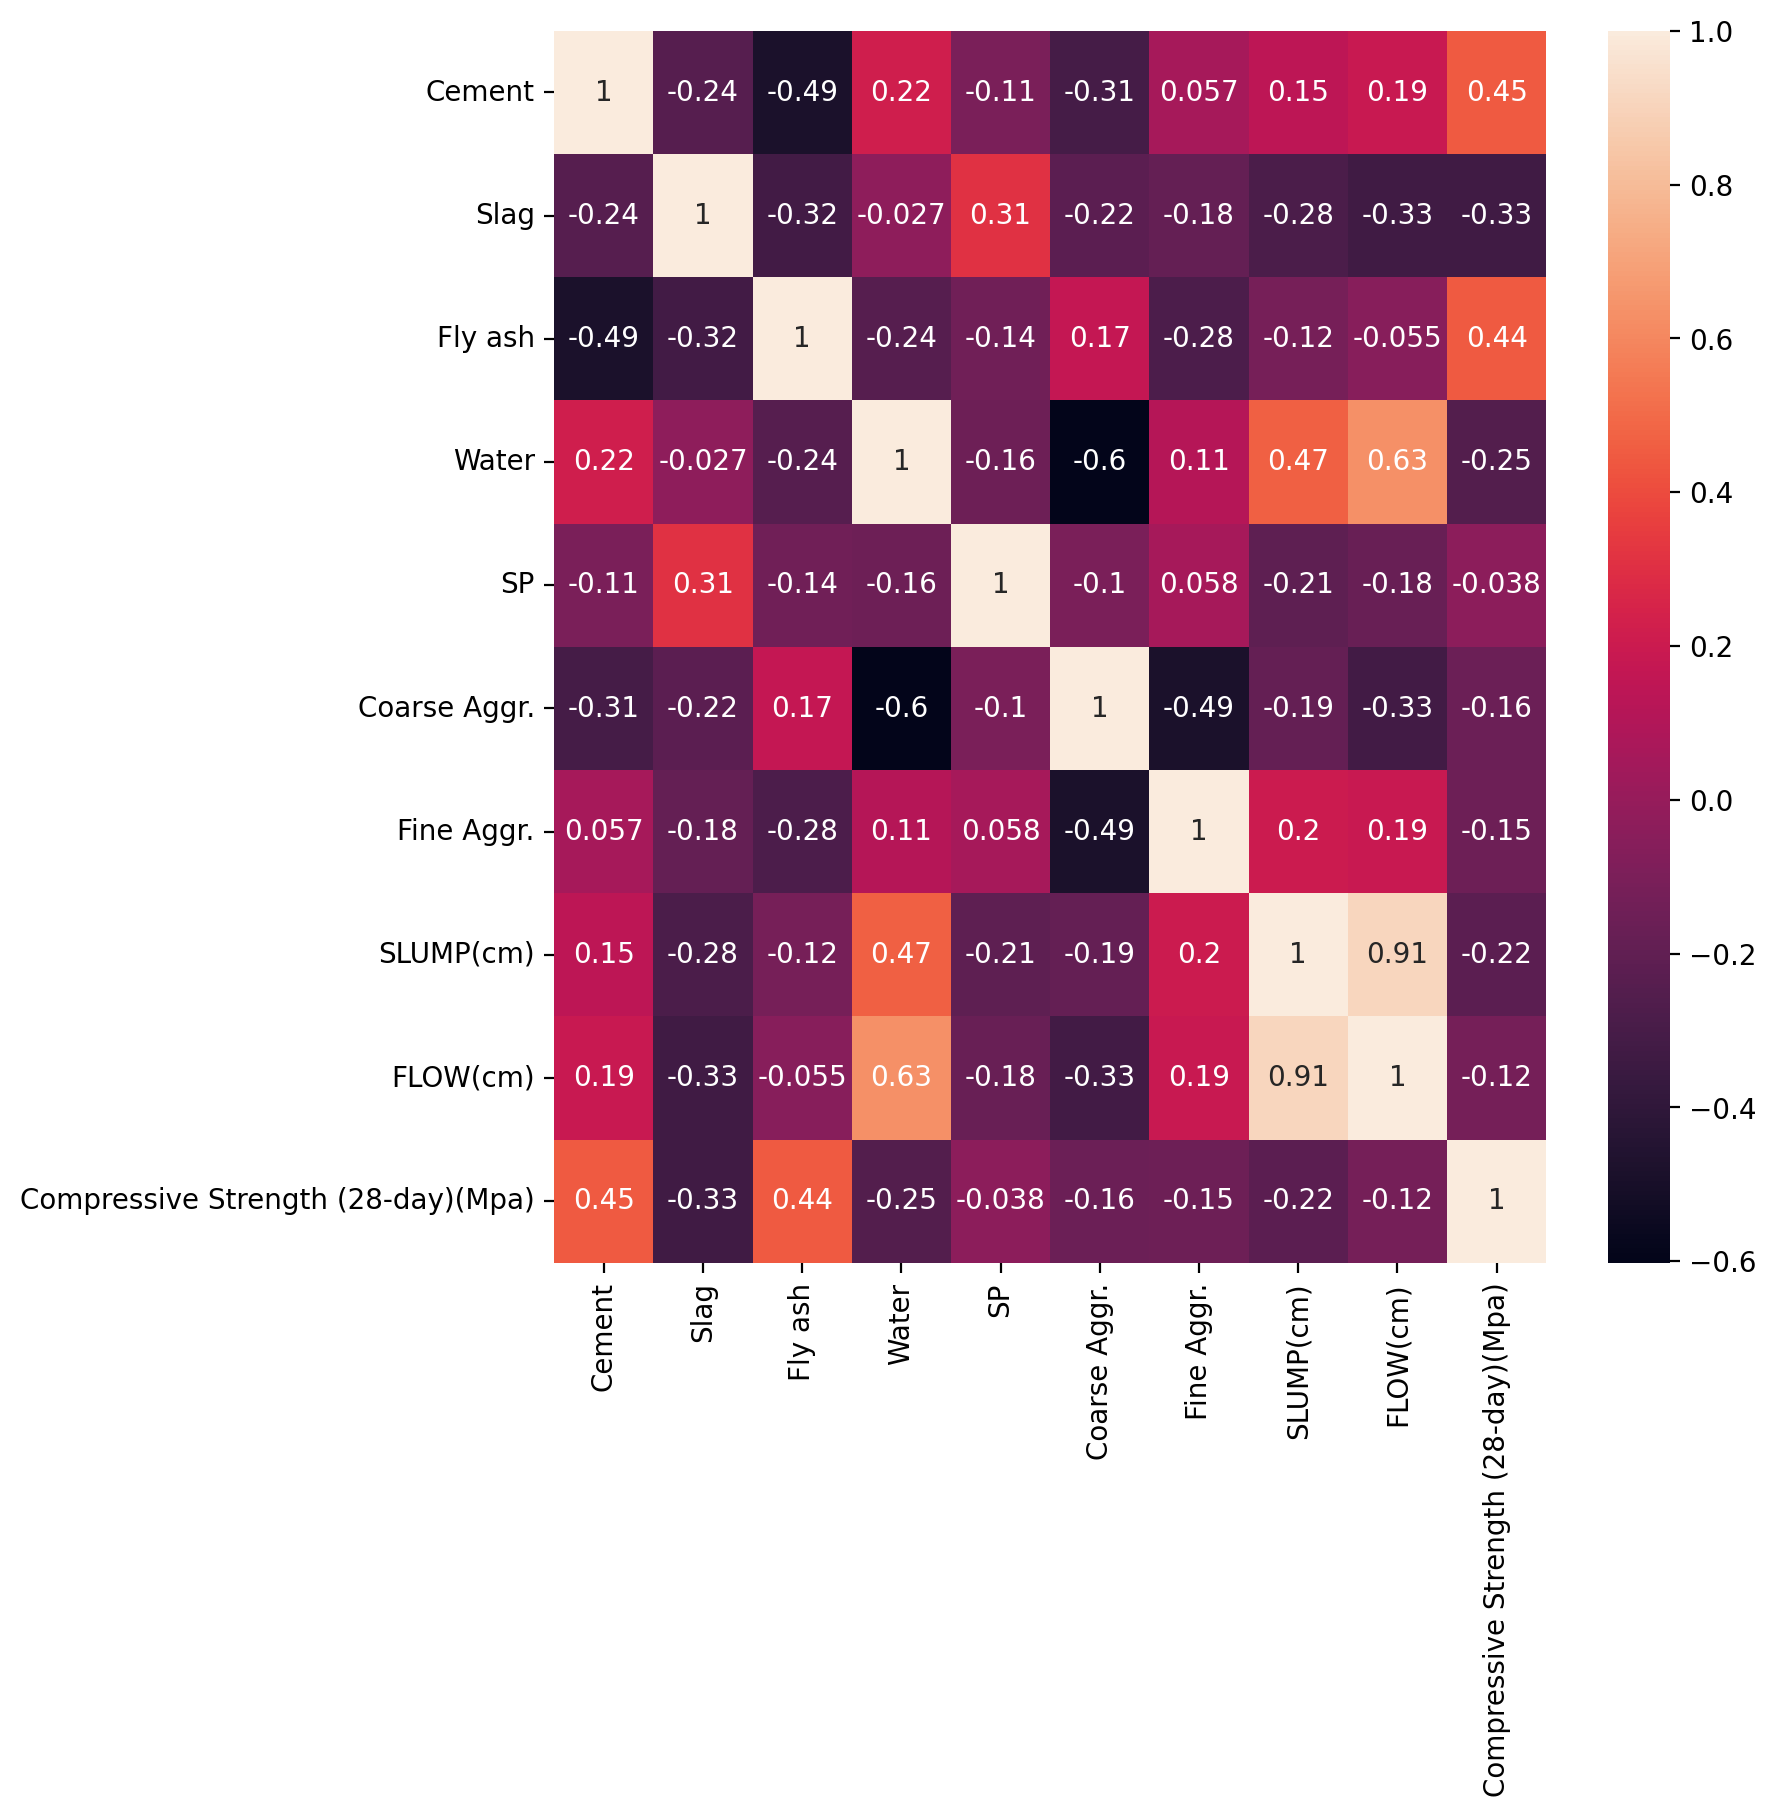

In [13]:
plt.figure(figsize=(8,8),dpi=200)
sns.heatmap(df.corr(), annot=True)

## Separating X and Y Variables

In [14]:
df.columns

Index(['Cement', 'Slag', 'Fly ash', 'Water', 'SP', 'Coarse Aggr.',
       'Fine Aggr.', 'SLUMP(cm)', 'FLOW(cm)',
       'Compressive Strength (28-day)(Mpa)'],
      dtype='object')

In [15]:
X = df.drop('Compressive Strength (28-day)(Mpa)', axis=1)
y = df['Compressive Strength (28-day)(Mpa)']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Creating Pipeline

In [17]:
model = SVR()

In [18]:
scaler = StandardScaler()

In [19]:
operations = [("scaler", scaler), ("model", model)]

In [20]:
model_pipeline = Pipeline(operations)

## Grid Model

In [21]:
model.get_params().keys()

dict_keys(['C', 'cache_size', 'coef0', 'degree', 'epsilon', 'gamma', 'kernel', 'max_iter', 'shrinking', 'tol', 'verbose'])

In [22]:
C = [0.001, 0.01, 0.1, 0.5, 1]
gamma = ['scale', 'auto']
kernel = ['rbf', 'linear', 'poly']
degree = [2,3,4]
epsilon = [0, 0.01, 0.1, 0.5, 1, 1.5, 2]

In [23]:
param_grid = {'model__C':C,
              'model__gamma':gamma,
              'model__kernel':kernel,
              'model__degree':degree,
              'model__epsilon':epsilon}

In [24]:
grid_model = GridSearchCV(model_pipeline, param_grid=param_grid)

In [25]:
grid_model.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR())]),
             param_grid={'model__C': [0.001, 0.01, 0.1, 0.5, 1],
                         'model__degree': [2, 3, 4],
                         'model__epsilon': [0, 0.01, 0.1, 0.5, 1, 1.5, 2],
                         'model__gamma': ['scale', 'auto'],
                         'model__kernel': ['rbf', 'linear', 'poly']})

In [26]:
grid_model.best_params_

{'model__C': 1,
 'model__degree': 2,
 'model__epsilon': 2,
 'model__gamma': 'scale',
 'model__kernel': 'linear'}

## Prediction and Evaluation

In [27]:
predictions = grid_model.predict(X_test)

In [28]:
print(f"MAE: {mean_absolute_error(y_test, predictions)}")
print(f"MSE: {mean_squared_error(y_test, predictions)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, predictions))}")

MAE: 2.5128012210762365
MSE: 10.10102074357006
RMSE: 3.178210305119858
